# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 12.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 19.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 30.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.6 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp4 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [30.0332195,-90.0226498] #defin the location, in New Orleans, LA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track) # (locations = locations)   #Use either track or locations

1337589020495376385
1337589020382162948
1337589021439008769
1337589021556404226
1337589022655442944
1337589022680637442
1337589022714019840
1337589023913750529
1337589024110874626
1337589024370741251
1337589025981554693
1337589026535170050
1337589026535030789
1337589026891603968
1337589026539274240
1337589028569317376
1337589029307625472
1337589029303304195
1337589031945854976
1337589033090895877
1337589032885366787
1337589033673895937
1337589034583994369
1337589035938631680
1337589036173684736
1337589036546990082
1337589036660051968
1337589037243138048
1337589039180943367
1337589039310974977
1337589041898921987
1337589042737799171
1337589042830061569
1337589043194974208
1337589043689820167
1337589044667064322
1337589044579012609
1337589044981551107
1337589045162078213
1337589046437142530
1337589045959012354
1337589047682850816
1337589047674462210
1337589049645797380
1337589050849550338
1337589051805798401
1337589051902275584
1337589051998789633
1337589053156282370
1337589054133706753


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "30.0332195,-90.0226498,150mi"  # defin the location, in New Orleans, LA
q = "COVID19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 02:49:58 +0000 2020'
'Sat Dec 12 02:49:18 +0000 2020'
'Sat Dec 12 02:46:41 +0000 2020'
'Sat Dec 12 02:45:26 +0000 2020'
'Sat Dec 12 02:42:55 +0000 2020'
'Sat Dec 12 02:42:37 +0000 2020'
'Sat Dec 12 02:42:36 +0000 2020'
'Sat Dec 12 02:37:45 +0000 2020'
'Sat Dec 12 02:36:10 +0000 2020'
'Sat Dec 12 02:34:56 +0000 2020'
'Sat Dec 12 02:34:23 +0000 2020'
'Sat Dec 12 02:33:48 +0000 2020'
'Sat Dec 12 02:32:45 +0000 2020'
'Sat Dec 12 02:32:23 +0000 2020'
'Sat Dec 12 02:32:19 +0000 2020'
'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:29:04 +0000 2020'
'Sat Dec 12 02:28:13 +0000 2020'
'Sat Dec 12 02:27:06 +0000 2020'
'Sat Dec 12 02:19:39 +0000 2020'
'Sat Dec 12 02:14:22 +0000 2020'
'Sat Dec 12 01:51:49 +0000 2020'
'Sat Dec 12 01:49:16 +0000 2020'
'Sat Dec 12 01:45:38 +0000 2020'
'Sat Dec 12 01:30:09 +0000 2020'
'Sat Dec 12 01:22:54 +0000 2020'
'Sat Dec 12 01:18:39 +0000 2020'
'Sat Dec 12 01:16:29 +0000 2020'
'Sat Dec 12 00:57:35 +0000 2020'
'Sat Dec 12 00:47:43 +0000 2020'
'Sat Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 11 21:22:54 +0000 2020'
'Fri Dec 11 21:20:50 +0000 2020'
'Fri Dec 11 21:20:04 +0000 2020'
'Fri Dec 11 21:18:23 +0000 2020'
'Fri Dec 11 21:17:49 +0000 2020'
'Fri Dec 11 21:17:13 +0000 2020'
'Fri Dec 11 21:17:05 +0000 2020'
'Fri Dec 11 21:16:19 +0000 2020'
'Fri Dec 11 21:13:53 +0000 2020'
'Fri Dec 11 21:13:51 +0000 2020'
'Fri Dec 11 21:13:50 +0000 2020'
'Fri Dec 11 21:13:46 +0000 2020'
'Fri Dec 11 21:12:14 +0000 2020'
'Fri Dec 11 21:10:53 +0000 2020'
'Fri Dec 11 21:09:33 +0000 2020'
'Fri Dec 11 21:09:27 +0000 2020'
'Fri Dec 11 21:09:09 +0000 2020'
'Fri Dec 11 21:03:37 +0000 2020'
'Fri Dec 11 21:01:27 +0000 2020'
'Fri Dec 11 20:55:39 +0000 2020'
'Fri Dec 11 20:53:13 +0000 2020'
'Fri Dec 11 20:53:12 +0000 2020'
'Fri Dec 11 20:52:27 +0000 2020'
'Fri Dec 11 20:50:19 +0000 2020'
'Fri Dec 11 20:50:18 +0000 2020'
'Fri Dec 11 20:49:09 +0000 2020'
'Fri Dec 11 20:43:30 +0000 2020'
'Fri Dec 11 20:41:55 +0000 2020'
'Fri Dec 11 20:41:02 +0000 2020'
'Fri Dec 11 20:36:58 +0000 2020'
'Fri Dec 1

'Fri Dec 11 07:06:57 +0000 2020'
'Fri Dec 11 07:03:29 +0000 2020'
'Fri Dec 11 07:02:57 +0000 2020'
'Fri Dec 11 07:01:28 +0000 2020'
'Fri Dec 11 06:58:31 +0000 2020'
'Fri Dec 11 06:49:00 +0000 2020'
'Fri Dec 11 06:40:13 +0000 2020'
'Fri Dec 11 06:34:31 +0000 2020'
'Fri Dec 11 06:33:56 +0000 2020'
'Fri Dec 11 06:27:36 +0000 2020'
'Fri Dec 11 06:26:30 +0000 2020'
'Fri Dec 11 06:24:29 +0000 2020'
'Fri Dec 11 06:22:31 +0000 2020'
'Fri Dec 11 06:14:28 +0000 2020'
'Fri Dec 11 06:03:27 +0000 2020'
'Fri Dec 11 05:59:17 +0000 2020'
'Fri Dec 11 05:54:39 +0000 2020'
'Fri Dec 11 05:42:58 +0000 2020'
'Fri Dec 11 05:34:43 +0000 2020'
'Fri Dec 11 05:33:34 +0000 2020'
'Fri Dec 11 05:33:07 +0000 2020'
'Fri Dec 11 05:32:40 +0000 2020'
'Fri Dec 11 05:31:57 +0000 2020'
'Fri Dec 11 05:31:12 +0000 2020'
'Fri Dec 11 05:29:51 +0000 2020'
'Fri Dec 11 05:29:16 +0000 2020'
'Fri Dec 11 05:27:28 +0000 2020'
'Fri Dec 11 05:26:21 +0000 2020'
'Fri Dec 11 05:24:39 +0000 2020'
'Fri Dec 11 05:21:04 +0000 2020'
'Fri Dec 1

'Thu Dec 10 21:11:22 +0000 2020'
'Thu Dec 10 21:10:42 +0000 2020'
'Thu Dec 10 21:10:37 +0000 2020'
'Thu Dec 10 21:05:13 +0000 2020'
'Thu Dec 10 21:02:41 +0000 2020'
'Thu Dec 10 21:02:01 +0000 2020'
'Thu Dec 10 21:00:34 +0000 2020'
'Thu Dec 10 20:58:35 +0000 2020'
'Thu Dec 10 20:58:04 +0000 2020'
'Thu Dec 10 20:58:02 +0000 2020'
'Thu Dec 10 20:55:56 +0000 2020'
'Thu Dec 10 20:53:38 +0000 2020'
'Thu Dec 10 20:50:44 +0000 2020'
'Thu Dec 10 20:44:43 +0000 2020'
'Thu Dec 10 20:43:53 +0000 2020'
'Thu Dec 10 20:43:06 +0000 2020'
'Thu Dec 10 20:40:24 +0000 2020'
'Thu Dec 10 20:39:47 +0000 2020'
'Thu Dec 10 20:38:26 +0000 2020'
'Thu Dec 10 20:38:06 +0000 2020'
'Thu Dec 10 20:36:38 +0000 2020'
'Thu Dec 10 20:33:35 +0000 2020'
'Thu Dec 10 20:33:17 +0000 2020'
'Thu Dec 10 20:32:31 +0000 2020'
'Thu Dec 10 20:32:15 +0000 2020'
'Thu Dec 10 20:27:12 +0000 2020'
'Thu Dec 10 20:24:53 +0000 2020'
'Thu Dec 10 20:22:49 +0000 2020'
'Thu Dec 10 20:21:09 +0000 2020'
'Thu Dec 10 20:20:11 +0000 2020'
'Thu Dec 1

'Thu Dec 10 13:32:25 +0000 2020'
'Thu Dec 10 13:31:52 +0000 2020'
'Thu Dec 10 13:31:27 +0000 2020'
'Thu Dec 10 13:31:22 +0000 2020'
'Thu Dec 10 13:30:01 +0000 2020'
'Thu Dec 10 13:29:47 +0000 2020'
'Thu Dec 10 13:26:24 +0000 2020'
'Thu Dec 10 13:25:12 +0000 2020'
'Thu Dec 10 13:24:58 +0000 2020'
'Thu Dec 10 13:22:56 +0000 2020'
'Thu Dec 10 13:22:53 +0000 2020'
'Thu Dec 10 13:22:31 +0000 2020'
'Thu Dec 10 13:17:33 +0000 2020'
'Thu Dec 10 13:16:16 +0000 2020'
'Thu Dec 10 13:15:54 +0000 2020'
'Thu Dec 10 13:15:11 +0000 2020'
'Thu Dec 10 13:14:58 +0000 2020'
'Thu Dec 10 13:13:09 +0000 2020'
'Thu Dec 10 13:11:39 +0000 2020'
'Thu Dec 10 13:05:17 +0000 2020'
'Thu Dec 10 13:02:28 +0000 2020'
'Thu Dec 10 12:46:07 +0000 2020'
'Thu Dec 10 12:45:32 +0000 2020'
'Thu Dec 10 12:40:36 +0000 2020'
'Thu Dec 10 12:39:43 +0000 2020'
'Thu Dec 10 12:39:40 +0000 2020'
'Thu Dec 10 12:39:30 +0000 2020'
'Thu Dec 10 12:28:07 +0000 2020'
'Thu Dec 10 12:27:43 +0000 2020'
'Thu Dec 10 12:21:57 +0000 2020'
'Thu Dec 1

'Thu Dec 10 02:58:18 +0000 2020'
'Thu Dec 10 02:57:39 +0000 2020'
'Thu Dec 10 02:57:25 +0000 2020'
'Thu Dec 10 02:56:09 +0000 2020'
'Thu Dec 10 02:55:53 +0000 2020'
'Thu Dec 10 02:55:44 +0000 2020'
'Thu Dec 10 02:55:34 +0000 2020'
'Thu Dec 10 02:55:14 +0000 2020'
'Thu Dec 10 02:54:59 +0000 2020'
'Thu Dec 10 02:54:24 +0000 2020'
'Thu Dec 10 02:54:01 +0000 2020'
'Thu Dec 10 02:53:05 +0000 2020'
'Thu Dec 10 02:53:02 +0000 2020'
'Thu Dec 10 02:52:54 +0000 2020'
'Thu Dec 10 02:52:48 +0000 2020'
'Thu Dec 10 02:51:30 +0000 2020'
'Thu Dec 10 02:51:00 +0000 2020'
'Thu Dec 10 02:50:49 +0000 2020'
'Thu Dec 10 02:50:38 +0000 2020'
'Thu Dec 10 02:50:15 +0000 2020'
'Thu Dec 10 02:49:47 +0000 2020'
'Thu Dec 10 02:49:37 +0000 2020'
'Thu Dec 10 02:49:35 +0000 2020'
'Thu Dec 10 02:47:48 +0000 2020'
'Thu Dec 10 02:47:23 +0000 2020'
'Thu Dec 10 02:47:09 +0000 2020'
'Thu Dec 10 02:46:42 +0000 2020'
'Thu Dec 10 02:46:41 +0000 2020'
'Thu Dec 10 02:46:35 +0000 2020'
'Thu Dec 10 02:46:03 +0000 2020'
'Thu Dec 1

'Thu Dec 10 01:28:52 +0000 2020'
'Thu Dec 10 01:28:21 +0000 2020'
'Thu Dec 10 01:26:56 +0000 2020'
'Thu Dec 10 01:26:37 +0000 2020'
'Thu Dec 10 01:26:32 +0000 2020'
'Thu Dec 10 01:25:39 +0000 2020'
'Thu Dec 10 01:24:24 +0000 2020'
'Thu Dec 10 01:22:35 +0000 2020'
'Thu Dec 10 01:21:34 +0000 2020'
'Thu Dec 10 01:20:24 +0000 2020'
'Thu Dec 10 01:19:21 +0000 2020'
'Thu Dec 10 01:11:57 +0000 2020'
'Thu Dec 10 01:10:51 +0000 2020'
'Thu Dec 10 01:09:08 +0000 2020'
'Thu Dec 10 01:09:05 +0000 2020'
'Thu Dec 10 01:08:59 +0000 2020'
'Thu Dec 10 01:08:45 +0000 2020'
'Thu Dec 10 01:05:47 +0000 2020'
'Thu Dec 10 01:04:14 +0000 2020'
'Thu Dec 10 01:02:22 +0000 2020'
'Thu Dec 10 01:00:57 +0000 2020'
'Thu Dec 10 00:56:14 +0000 2020'
'Thu Dec 10 00:55:59 +0000 2020'
'Thu Dec 10 00:51:12 +0000 2020'
'Thu Dec 10 00:50:16 +0000 2020'
'Thu Dec 10 00:48:37 +0000 2020'
'Thu Dec 10 00:46:39 +0000 2020'
'Thu Dec 10 00:45:36 +0000 2020'
'Thu Dec 10 00:43:59 +0000 2020'
'Thu Dec 10 00:42:19 +0000 2020'
'Thu Dec 1

'Wed Dec 09 17:09:03 +0000 2020'
'Wed Dec 09 17:09:03 +0000 2020'
'Wed Dec 09 17:09:03 +0000 2020'
'Wed Dec 09 17:09:03 +0000 2020'
'Wed Dec 09 17:04:20 +0000 2020'
'Wed Dec 09 17:03:07 +0000 2020'
'Wed Dec 09 17:02:58 +0000 2020'
'Wed Dec 09 16:58:57 +0000 2020'
'Wed Dec 09 16:56:36 +0000 2020'
'Wed Dec 09 16:54:59 +0000 2020'
'Wed Dec 09 16:54:08 +0000 2020'
'Wed Dec 09 16:51:28 +0000 2020'
'Wed Dec 09 16:49:52 +0000 2020'
'Wed Dec 09 16:45:50 +0000 2020'
'Wed Dec 09 16:45:01 +0000 2020'
'Wed Dec 09 16:41:21 +0000 2020'
'Wed Dec 09 16:40:25 +0000 2020'
'Wed Dec 09 16:39:34 +0000 2020'
'Wed Dec 09 16:39:33 +0000 2020'
'Wed Dec 09 16:36:11 +0000 2020'
'Wed Dec 09 16:35:32 +0000 2020'
'Wed Dec 09 16:34:30 +0000 2020'
'Wed Dec 09 16:33:44 +0000 2020'
'Wed Dec 09 16:31:48 +0000 2020'
'Wed Dec 09 16:31:08 +0000 2020'
'Wed Dec 09 16:24:21 +0000 2020'
'Wed Dec 09 16:24:14 +0000 2020'
'Wed Dec 09 16:19:55 +0000 2020'
'Wed Dec 09 16:09:40 +0000 2020'
'Wed Dec 09 16:09:23 +0000 2020'
'Wed Dec 0

'Tue Dec 08 23:04:37 +0000 2020'
'Tue Dec 08 23:03:02 +0000 2020'
'Tue Dec 08 23:02:46 +0000 2020'
'Tue Dec 08 23:02:02 +0000 2020'
'Tue Dec 08 23:01:11 +0000 2020'
'Tue Dec 08 23:00:35 +0000 2020'
'Tue Dec 08 22:46:44 +0000 2020'
'Tue Dec 08 22:46:34 +0000 2020'
'Tue Dec 08 22:40:26 +0000 2020'
'Tue Dec 08 22:36:58 +0000 2020'
'Tue Dec 08 22:35:46 +0000 2020'
'Tue Dec 08 22:32:17 +0000 2020'
'Tue Dec 08 22:32:01 +0000 2020'
'Tue Dec 08 22:25:27 +0000 2020'
'Tue Dec 08 22:22:44 +0000 2020'
'Tue Dec 08 22:22:40 +0000 2020'
'Tue Dec 08 22:20:03 +0000 2020'
'Tue Dec 08 22:11:27 +0000 2020'
'Tue Dec 08 22:09:54 +0000 2020'
'Tue Dec 08 22:08:34 +0000 2020'
'Tue Dec 08 22:08:01 +0000 2020'
'Tue Dec 08 22:05:07 +0000 2020'
'Tue Dec 08 21:59:25 +0000 2020'
'Tue Dec 08 21:58:04 +0000 2020'
'Tue Dec 08 21:55:08 +0000 2020'
'Tue Dec 08 21:54:07 +0000 2020'
'Tue Dec 08 21:43:30 +0000 2020'
'Tue Dec 08 21:42:57 +0000 2020'
'Tue Dec 08 21:40:50 +0000 2020'
'Tue Dec 08 21:39:32 +0000 2020'
'Tue Dec 0

'Tue Dec 08 14:34:19 +0000 2020'
'Tue Dec 08 14:33:07 +0000 2020'
'Tue Dec 08 14:32:36 +0000 2020'
'Tue Dec 08 14:30:39 +0000 2020'
'Tue Dec 08 14:29:46 +0000 2020'
'Tue Dec 08 14:26:25 +0000 2020'
'Tue Dec 08 14:24:59 +0000 2020'
'Tue Dec 08 14:24:04 +0000 2020'
'Tue Dec 08 14:21:49 +0000 2020'
'Tue Dec 08 14:21:22 +0000 2020'
'Tue Dec 08 14:18:49 +0000 2020'
'Tue Dec 08 14:18:33 +0000 2020'
'Tue Dec 08 14:16:42 +0000 2020'
'Tue Dec 08 14:12:13 +0000 2020'
'Tue Dec 08 14:10:52 +0000 2020'
'Tue Dec 08 14:10:48 +0000 2020'
'Tue Dec 08 14:10:02 +0000 2020'
'Tue Dec 08 14:09:03 +0000 2020'
'Tue Dec 08 14:08:32 +0000 2020'
'Tue Dec 08 14:08:04 +0000 2020'
'Tue Dec 08 14:06:16 +0000 2020'
'Tue Dec 08 14:02:37 +0000 2020'
'Tue Dec 08 14:01:49 +0000 2020'
'Tue Dec 08 14:01:40 +0000 2020'
'Tue Dec 08 14:01:15 +0000 2020'
'Tue Dec 08 14:00:24 +0000 2020'
'Tue Dec 08 14:00:06 +0000 2020'
'Tue Dec 08 13:59:26 +0000 2020'
'Tue Dec 08 13:59:00 +0000 2020'
'Tue Dec 08 13:58:58 +0000 2020'
'Tue Dec 0

'Mon Dec 07 19:29:15 +0000 2020'
'Mon Dec 07 19:27:26 +0000 2020'
'Mon Dec 07 19:26:46 +0000 2020'
'Mon Dec 07 19:24:07 +0000 2020'
'Mon Dec 07 19:23:48 +0000 2020'
'Mon Dec 07 19:23:30 +0000 2020'
'Mon Dec 07 19:21:46 +0000 2020'
'Mon Dec 07 19:20:25 +0000 2020'
'Mon Dec 07 19:20:18 +0000 2020'
'Mon Dec 07 19:19:49 +0000 2020'
'Mon Dec 07 19:19:42 +0000 2020'
'Mon Dec 07 19:19:39 +0000 2020'
'Mon Dec 07 19:19:29 +0000 2020'
'Mon Dec 07 19:19:08 +0000 2020'
'Mon Dec 07 19:18:20 +0000 2020'
'Mon Dec 07 19:17:22 +0000 2020'
'Mon Dec 07 19:17:13 +0000 2020'
'Mon Dec 07 19:15:48 +0000 2020'
'Mon Dec 07 19:15:10 +0000 2020'
'Mon Dec 07 19:08:46 +0000 2020'
'Mon Dec 07 19:06:27 +0000 2020'
'Mon Dec 07 19:05:08 +0000 2020'
'Mon Dec 07 19:02:16 +0000 2020'
'Mon Dec 07 19:01:30 +0000 2020'
'Mon Dec 07 19:00:49 +0000 2020'
'Mon Dec 07 19:00:42 +0000 2020'
'Mon Dec 07 18:59:16 +0000 2020'
'Mon Dec 07 18:58:22 +0000 2020'
'Mon Dec 07 18:57:56 +0000 2020'
'Mon Dec 07 18:57:34 +0000 2020'
'Mon Dec 0

'Mon Dec 07 05:50:55 +0000 2020'
'Mon Dec 07 05:49:15 +0000 2020'
'Mon Dec 07 05:45:29 +0000 2020'
'Mon Dec 07 05:42:01 +0000 2020'
'Mon Dec 07 05:31:07 +0000 2020'
'Mon Dec 07 05:23:48 +0000 2020'
'Mon Dec 07 05:18:52 +0000 2020'
'Mon Dec 07 05:01:52 +0000 2020'
'Mon Dec 07 04:56:47 +0000 2020'
'Mon Dec 07 04:37:04 +0000 2020'
'Mon Dec 07 04:26:21 +0000 2020'
'Mon Dec 07 04:22:56 +0000 2020'
'Mon Dec 07 04:21:17 +0000 2020'
'Mon Dec 07 04:17:48 +0000 2020'
'Mon Dec 07 04:09:12 +0000 2020'
'Mon Dec 07 03:58:24 +0000 2020'
'Mon Dec 07 03:52:46 +0000 2020'
'Mon Dec 07 03:52:03 +0000 2020'
'Mon Dec 07 03:46:06 +0000 2020'
'Mon Dec 07 03:42:35 +0000 2020'
'Mon Dec 07 03:37:26 +0000 2020'
'Mon Dec 07 03:37:19 +0000 2020'
'Mon Dec 07 03:37:18 +0000 2020'
'Mon Dec 07 03:37:04 +0000 2020'
'Mon Dec 07 03:36:41 +0000 2020'
'Mon Dec 07 03:34:06 +0000 2020'
'Mon Dec 07 03:33:26 +0000 2020'
'Mon Dec 07 03:27:59 +0000 2020'
'Mon Dec 07 03:27:16 +0000 2020'
'Mon Dec 07 03:21:25 +0000 2020'
'Mon Dec 0

'Sun Dec 06 18:06:18 +0000 2020'
'Sun Dec 06 18:06:09 +0000 2020'
'Sun Dec 06 18:05:39 +0000 2020'
'Sun Dec 06 18:02:56 +0000 2020'
'Sun Dec 06 18:01:20 +0000 2020'
'Sun Dec 06 17:56:45 +0000 2020'
'Sun Dec 06 17:53:37 +0000 2020'
'Sun Dec 06 17:53:19 +0000 2020'
'Sun Dec 06 17:44:37 +0000 2020'
'Sun Dec 06 17:42:16 +0000 2020'
'Sun Dec 06 17:37:40 +0000 2020'
'Sun Dec 06 17:24:02 +0000 2020'
'Sun Dec 06 17:17:06 +0000 2020'
'Sun Dec 06 17:13:17 +0000 2020'
'Sun Dec 06 17:06:13 +0000 2020'
'Sun Dec 06 17:03:43 +0000 2020'
'Sun Dec 06 17:02:15 +0000 2020'
'Sun Dec 06 17:00:36 +0000 2020'
'Sun Dec 06 16:56:18 +0000 2020'
'Sun Dec 06 16:53:58 +0000 2020'
'Sun Dec 06 16:52:36 +0000 2020'
'Sun Dec 06 16:52:35 +0000 2020'
'Sun Dec 06 16:50:08 +0000 2020'
'Sun Dec 06 16:50:08 +0000 2020'
'Sun Dec 06 16:48:37 +0000 2020'
'Sun Dec 06 16:37:16 +0000 2020'
'Sun Dec 06 16:32:21 +0000 2020'
'Sun Dec 06 16:31:46 +0000 2020'
'Sun Dec 06 16:29:57 +0000 2020'
'Sun Dec 06 16:29:03 +0000 2020'
'Sun Dec 0

'Sat Dec 05 17:31:40 +0000 2020'
'Sat Dec 05 17:31:03 +0000 2020'
'Sat Dec 05 17:30:43 +0000 2020'
'Sat Dec 05 17:30:10 +0000 2020'
'Sat Dec 05 17:29:55 +0000 2020'
'Sat Dec 05 17:28:31 +0000 2020'
'Sat Dec 05 17:27:13 +0000 2020'
'Sat Dec 05 17:26:00 +0000 2020'
'Sat Dec 05 17:25:39 +0000 2020'
'Sat Dec 05 17:25:33 +0000 2020'
'Sat Dec 05 17:24:41 +0000 2020'
'Sat Dec 05 17:24:34 +0000 2020'
'Sat Dec 05 17:24:18 +0000 2020'
'Sat Dec 05 17:22:08 +0000 2020'
'Sat Dec 05 17:18:25 +0000 2020'
'Sat Dec 05 17:14:22 +0000 2020'
'Sat Dec 05 17:13:26 +0000 2020'
'Sat Dec 05 17:11:52 +0000 2020'
'Sat Dec 05 17:07:47 +0000 2020'
'Sat Dec 05 17:04:05 +0000 2020'
'Sat Dec 05 17:03:02 +0000 2020'
'Sat Dec 05 16:54:28 +0000 2020'
'Sat Dec 05 16:52:41 +0000 2020'
'Sat Dec 05 16:52:01 +0000 2020'
'Sat Dec 05 16:47:35 +0000 2020'
'Sat Dec 05 16:44:24 +0000 2020'
'Sat Dec 05 16:35:07 +0000 2020'
'Sat Dec 05 16:33:16 +0000 2020'
'Sat Dec 05 16:29:10 +0000 2020'
'Sat Dec 05 16:28:01 +0000 2020'
'Sat Dec 0

'Sat Dec 05 03:28:00 +0000 2020'
'Sat Dec 05 03:27:27 +0000 2020'
'Sat Dec 05 03:13:48 +0000 2020'
'Sat Dec 05 03:12:53 +0000 2020'
'Sat Dec 05 03:12:52 +0000 2020'
'Sat Dec 05 02:45:33 +0000 2020'
'Sat Dec 05 02:38:41 +0000 2020'
'Sat Dec 05 02:34:32 +0000 2020'
'Sat Dec 05 02:30:26 +0000 2020'
'Sat Dec 05 02:30:10 +0000 2020'
'Sat Dec 05 02:19:48 +0000 2020'
'Sat Dec 05 02:18:53 +0000 2020'
'Sat Dec 05 02:14:30 +0000 2020'
'Sat Dec 05 02:13:32 +0000 2020'
'Sat Dec 05 02:04:06 +0000 2020'
'Sat Dec 05 02:02:00 +0000 2020'
'Sat Dec 05 01:47:51 +0000 2020'
'Sat Dec 05 01:47:48 +0000 2020'
'Sat Dec 05 01:41:10 +0000 2020'
'Sat Dec 05 01:22:34 +0000 2020'
'Sat Dec 05 01:18:38 +0000 2020'
'Sat Dec 05 01:03:00 +0000 2020'
'Sat Dec 05 00:56:36 +0000 2020'
'Sat Dec 05 00:53:36 +0000 2020'
'Sat Dec 05 00:49:02 +0000 2020'
'Sat Dec 05 00:45:24 +0000 2020'
'Sat Dec 05 00:42:53 +0000 2020'
'Sat Dec 05 00:39:22 +0000 2020'
'Sat Dec 05 00:38:07 +0000 2020'
'Sat Dec 05 00:35:50 +0000 2020'
'Sat Dec 0

'Fri Dec 04 16:31:04 +0000 2020'
'Fri Dec 04 16:30:45 +0000 2020'
'Fri Dec 04 16:29:46 +0000 2020'
'Fri Dec 04 16:28:43 +0000 2020'
'Fri Dec 04 16:28:15 +0000 2020'
'Fri Dec 04 16:27:59 +0000 2020'
'Fri Dec 04 16:27:58 +0000 2020'
'Fri Dec 04 16:27:16 +0000 2020'
'Fri Dec 04 16:25:45 +0000 2020'
'Fri Dec 04 16:25:40 +0000 2020'
'Fri Dec 04 16:22:30 +0000 2020'
'Fri Dec 04 16:21:24 +0000 2020'
'Fri Dec 04 16:21:04 +0000 2020'
'Fri Dec 04 16:17:17 +0000 2020'
'Fri Dec 04 16:16:33 +0000 2020'
'Fri Dec 04 16:15:46 +0000 2020'
'Fri Dec 04 16:12:29 +0000 2020'
'Fri Dec 04 16:12:14 +0000 2020'
'Fri Dec 04 16:11:30 +0000 2020'
'Fri Dec 04 16:11:13 +0000 2020'
'Fri Dec 04 16:11:02 +0000 2020'
'Fri Dec 04 16:10:32 +0000 2020'
'Fri Dec 04 16:09:08 +0000 2020'
'Fri Dec 04 16:07:47 +0000 2020'
'Fri Dec 04 16:04:40 +0000 2020'
'Fri Dec 04 16:04:18 +0000 2020'
'Fri Dec 04 16:03:40 +0000 2020'
'Fri Dec 04 16:00:14 +0000 2020'
'Fri Dec 04 15:53:06 +0000 2020'
'Fri Dec 04 15:52:23 +0000 2020'
'Fri Dec 0

'Fri Dec 04 02:08:36 +0000 2020'
'Fri Dec 04 02:07:54 +0000 2020'
'Fri Dec 04 02:07:40 +0000 2020'
'Fri Dec 04 02:07:31 +0000 2020'
'Fri Dec 04 02:06:46 +0000 2020'
'Fri Dec 04 02:05:16 +0000 2020'
'Fri Dec 04 02:05:13 +0000 2020'
'Fri Dec 04 02:05:07 +0000 2020'
'Fri Dec 04 02:04:38 +0000 2020'
'Fri Dec 04 02:04:10 +0000 2020'
'Fri Dec 04 02:03:42 +0000 2020'
'Fri Dec 04 02:03:02 +0000 2020'
'Fri Dec 04 02:02:53 +0000 2020'
'Fri Dec 04 02:02:31 +0000 2020'
'Fri Dec 04 02:02:25 +0000 2020'
'Fri Dec 04 02:02:07 +0000 2020'
'Fri Dec 04 02:02:01 +0000 2020'
'Fri Dec 04 02:01:47 +0000 2020'
'Fri Dec 04 02:01:32 +0000 2020'
'Fri Dec 04 02:01:11 +0000 2020'
'Fri Dec 04 02:01:11 +0000 2020'
'Fri Dec 04 02:01:05 +0000 2020'
'Fri Dec 04 02:01:03 +0000 2020'
'Fri Dec 04 02:00:58 +0000 2020'
'Fri Dec 04 02:00:57 +0000 2020'
'Fri Dec 04 02:00:48 +0000 2020'
'Fri Dec 04 02:00:27 +0000 2020'
'Fri Dec 04 01:59:40 +0000 2020'
'Fri Dec 04 01:59:11 +0000 2020'
'Fri Dec 04 01:58:42 +0000 2020'
'Fri Dec 0

'Thu Dec 03 17:40:33 +0000 2020'
'Thu Dec 03 17:39:17 +0000 2020'
'Thu Dec 03 17:38:27 +0000 2020'
'Thu Dec 03 17:37:54 +0000 2020'
'Thu Dec 03 17:36:57 +0000 2020'
'Thu Dec 03 17:36:52 +0000 2020'
'Thu Dec 03 17:36:36 +0000 2020'
'Thu Dec 03 17:36:15 +0000 2020'
'Thu Dec 03 17:36:11 +0000 2020'
'Thu Dec 03 17:36:08 +0000 2020'
'Thu Dec 03 17:36:03 +0000 2020'
'Thu Dec 03 17:34:32 +0000 2020'
'Thu Dec 03 17:29:37 +0000 2020'
'Thu Dec 03 17:28:39 +0000 2020'
'Thu Dec 03 17:27:19 +0000 2020'
'Thu Dec 03 17:09:03 +0000 2020'
'Thu Dec 03 17:07:12 +0000 2020'
'Thu Dec 03 17:07:06 +0000 2020'
'Thu Dec 03 17:06:47 +0000 2020'
'Thu Dec 03 17:04:05 +0000 2020'
'Thu Dec 03 17:02:44 +0000 2020'
'Thu Dec 03 16:51:57 +0000 2020'
'Thu Dec 03 16:47:41 +0000 2020'
'Thu Dec 03 16:44:28 +0000 2020'
'Thu Dec 03 16:40:25 +0000 2020'
'Thu Dec 03 16:34:44 +0000 2020'
'Thu Dec 03 16:34:30 +0000 2020'
'Thu Dec 03 16:28:21 +0000 2020'
'Thu Dec 03 16:27:41 +0000 2020'
'Thu Dec 03 16:17:42 +0000 2020'
'Thu Dec 0

'Thu Dec 03 03:58:19 +0000 2020'
'Thu Dec 03 03:57:54 +0000 2020'
'Thu Dec 03 03:57:25 +0000 2020'
'Thu Dec 03 03:56:03 +0000 2020'
'Thu Dec 03 03:55:56 +0000 2020'
'Thu Dec 03 03:53:29 +0000 2020'
'Thu Dec 03 03:52:18 +0000 2020'
'Thu Dec 03 03:51:35 +0000 2020'
'Thu Dec 03 03:51:06 +0000 2020'
'Thu Dec 03 03:50:53 +0000 2020'
'Thu Dec 03 03:50:25 +0000 2020'
'Thu Dec 03 03:49:26 +0000 2020'
'Thu Dec 03 03:48:54 +0000 2020'
'Thu Dec 03 03:48:47 +0000 2020'
'Thu Dec 03 03:48:41 +0000 2020'
'Thu Dec 03 03:48:31 +0000 2020'
'Thu Dec 03 03:47:41 +0000 2020'
'Thu Dec 03 03:46:56 +0000 2020'
'Thu Dec 03 03:45:09 +0000 2020'
'Thu Dec 03 03:44:45 +0000 2020'
'Thu Dec 03 03:43:37 +0000 2020'
'Thu Dec 03 03:42:38 +0000 2020'
'Thu Dec 03 03:42:09 +0000 2020'
'Thu Dec 03 03:41:49 +0000 2020'
'Thu Dec 03 03:41:44 +0000 2020'
'Thu Dec 03 03:41:04 +0000 2020'
'Thu Dec 03 03:40:52 +0000 2020'
'Thu Dec 03 03:40:31 +0000 2020'
'Thu Dec 03 03:40:26 +0000 2020'
'Thu Dec 03 03:40:05 +0000 2020'
'Thu Dec 0

'Wed Dec 02 21:27:01 +0000 2020'
'Wed Dec 02 21:21:05 +0000 2020'
'Wed Dec 02 21:19:42 +0000 2020'
'Wed Dec 02 21:17:45 +0000 2020'
'Wed Dec 02 21:15:25 +0000 2020'
'Wed Dec 02 21:14:48 +0000 2020'
'Wed Dec 02 21:14:03 +0000 2020'
'Wed Dec 02 21:13:34 +0000 2020'
'Wed Dec 02 21:13:31 +0000 2020'
'Wed Dec 02 21:11:09 +0000 2020'
'Wed Dec 02 21:10:02 +0000 2020'
'Wed Dec 02 21:09:27 +0000 2020'
'Wed Dec 02 21:09:04 +0000 2020'
'Wed Dec 02 21:07:40 +0000 2020'
'Wed Dec 02 21:06:14 +0000 2020'
'Wed Dec 02 21:05:45 +0000 2020'
'Wed Dec 02 21:01:57 +0000 2020'
'Wed Dec 02 21:01:38 +0000 2020'
'Wed Dec 02 20:58:00 +0000 2020'
'Wed Dec 02 20:56:32 +0000 2020'
'Wed Dec 02 20:54:49 +0000 2020'
'Wed Dec 02 20:54:39 +0000 2020'
'Wed Dec 02 20:52:28 +0000 2020'
'Wed Dec 02 20:52:10 +0000 2020'
'Wed Dec 02 20:51:36 +0000 2020'
'Wed Dec 02 20:48:59 +0000 2020'
'Wed Dec 02 20:46:38 +0000 2020'
'Wed Dec 02 20:46:37 +0000 2020'
'Wed Dec 02 20:46:04 +0000 2020'
'Wed Dec 02 20:45:49 +0000 2020'
'Wed Dec 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [22]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

17046
12185


Create a text index and print the Tweets containing specific keywords. 

In [23]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID19"}}) # return tweets contain COVID19

Use pprint to display tweets

In [25]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Teddy Johnson
text: #thursdaymorning #COVID19 #COVIDー19 #tommy3mil
----
name: Barbara Spencer
text: @realDonaldTrump COVID19 COVID19 COVID19... the "fake news" has NOT stopped talking about it because it's getting W… https://t.co/iRxQWZlujj
----
name: Déjon
text: if you get tested for covid19, it's for covid19... not diagnosing the flu 😣

Jesus.
----
name: Cal Elcombe
text: #BreakingNews #COVIDー19 #COVID19 #CovidVaccine #UK 
https://t.co/VCCnHdIvGU
----
name: Jαuиααααα.✨
text: RT @dejonsim: if you get tested for covid19, it's for covid19... not diagnosing the flu 😣

Jesus.
----
name: Dēstini.✨🌸💛
text: RT @dejonsim: if you get tested for covid19, it's for covid19... not diagnosing the flu 😣

Jesus.
----
name: 🦋Lynn
text: If you aren't wearing a mask you are a fucking asshole. Period. #COVID19 #COVIDー19 https://t.co/W3TK4Hg7o6
----
name: TechOWL
text: Covid19 hotline for people with Intelectual and Developmental Disabilities #COVID19 #IDD 

https://t.co/S91cNCi17d
----
name: D

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "COVID19"}}) # return tweets contain COVID19

Use pandas to display tweets

In [27]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,display_text_range,quote_count,reply_count,filter_level,timestamp_ms,quoted_status,quoted_status_permalink,extended_tweet
0,5fd4303e1b4564d86f413ac6,Thu Dec 03 19:23:29 +0000 2020,1334579023515672579,1334579023515672579,#thursdaymorning #COVID19 #COVIDー19 #tommy3mil,False,"{'hashtags': [{'text': 'thursdaymorning', 'ind...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.334579e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd4303f1b4564d86f413b6c,Thu Dec 03 14:14:42 +0000 2020,1334501316824068097,1334501316824068097,@realDonaldTrump COVID19 COVID19 COVID19... th...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd430221b4564d86f41307e,Wed Dec 09 19:01:08 +0000 2020,1336747726466211844,1336747726466211844,"if you get tested for covid19, it's for covid1...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd4303e1b4564d86f413acc,Thu Dec 03 19:13:50 +0000 2020,1334576595957411840,1334576595957411840,#BreakingNews #COVIDー19 #COVID19 #CovidVaccine...,False,"{'hashtags': [{'text': 'BreakingNews', 'indice...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd430181b4564d86f412d9b,Thu Dec 10 14:03:10 +0000 2020,1337035130959958017,1337035130959958017,"RT @dejonsim: if you get tested for covid19, i...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fd430181b4564d86f412d72,Thu Dec 10 15:02:51 +0000 2020,1337050148229230596,1337050148229230596,"RT @dejonsim: if you get tested for covid19, i...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fd430361b4564d86f41380f,Sat Dec 05 03:13:48 +0000 2020,1335059773432139776,1335059773432139776,If you aren't wearing a mask you are a fucking...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fd430371b4564d86f41384c,Fri Dec 04 23:02:01 +0000 2020,1334996407867088899,1334996407867088899,Covid19 hotline for people with Intelectual an...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fd4303b1b4564d86f4139f6,Fri Dec 04 02:23:04 +0000 2020,1334684618155581440,1334684618155581440,@Rparkerscience @gatewaypundit Not happening B...,False,"{'hashtags': [{'text': 'Event201', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.334625e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fd4303f1b4564d86f413b27,Thu Dec 03 16:44:28 +0000 2020,1334539005229060097,1334539005229060097,@drshamamohd At that time covid19 was not pres...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.258622e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


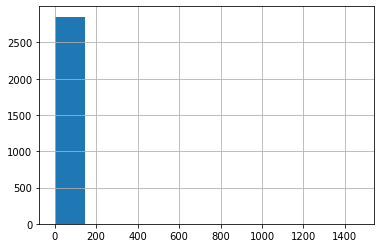

In [28]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count